In [4]:
import matplotlib.pyplot as plt
import torch
import torchvision.transforms.functional as functional

import data
import models

model = models.RotationalSphericalAutoencoder.load_from_checkpoint(
    "spherinator/ksl5gx72/checkpoints/epoch=10-step=5093.ckpt")

data_module = data.IllustrisSdssDataModule(
    data_directories=["/home/doserbd/data/machine-learning/SKIRT_synthetic_images/TNG50/sdss/snapnum_095/data/"],
    num_workers=1, batch_size=1)
data_module.setup("fit")
data_loader = data_module.train_dataloader()

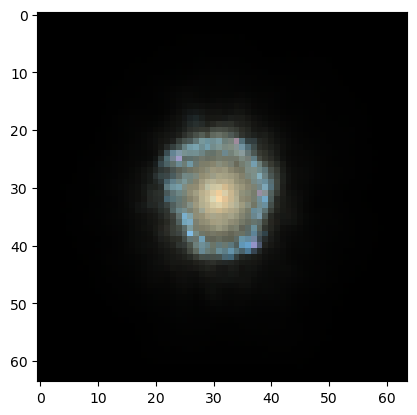

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


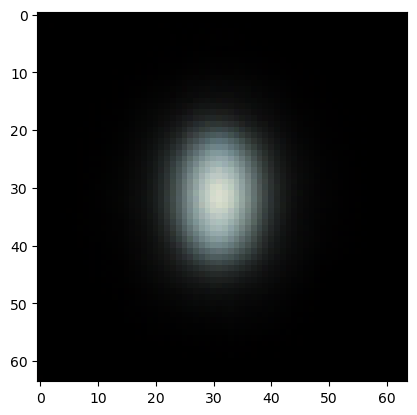

In [5]:
for batch in data_loader:
    image = batch["image"]
    image = image.to(model.device)
    image = functional.rotate(image, 0.0, expand=False)
    image = functional.center_crop(image, [256,256])
    input = functional.resize(image, [64,64], antialias=False)

    plt.imshow(input.cpu().numpy().squeeze().T) # squeeze removes the batch dimension and transposes brings the color channel to the end
    plt.show()

    recon, _ = model(input)

    plt.imshow(recon.cpu().detach().numpy().squeeze().T)
    plt.show()
    
    break